In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
genes = ['gene' + str(i) for i in range(1,101)]
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

In [4]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [5]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)

In [6]:
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4   wt5  ko1   ko2  ko3  ko4  ko5
gene1  612  565  615  566   570  674   683  714  682  738
gene2  644  704  686  720   682  262   253  239  284  277
gene3  824  891  896  850   854  329   372  375  377  363
gene4  946  963  966  910  1007  937  1014  898  944  978
gene5  903  918  965  922   876  272   259  253  279  264
(100, 10)


In [7]:
# First center and scale the data
scaled_data = preprocessing.scale(data.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

/home/davorh/davorMLpy3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  


In [8]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

In [9]:
per_var

array([86.1,  3.1,  2.9,  2.4,  1.8,  1.3,  0.9,  0.8,  0.7,  0. ])

In [10]:
np.cumsum(per_var)

array([ 86.1,  89.2,  92.1,  94.5,  96.3,  97.6,  98.5,  99.3, 100. ,
       100. ])

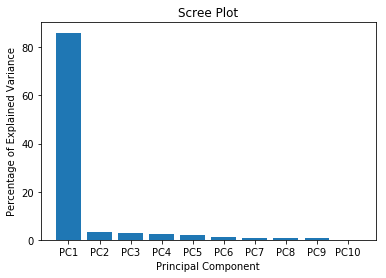

In [11]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [12]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-8.984461,3.905690,-2.005754,0.035660,-0.819856,-1.017927,-0.337879,0.498806,-0.324516,5.868175e-16
wt2,-9.411502,-1.369332,0.840756,2.669307,0.752125,-1.783017,0.950369,-0.557534,0.109392,-1.868570e-18
wt3,-9.427371,0.192173,-0.795698,1.187579,0.018091,2.543692,-0.280801,-0.713568,1.042152,-1.858937e-17
wt4,-8.916875,-0.027553,3.078628,-1.655976,0.700364,0.266433,0.104606,1.560542,0.427585,-2.622808e-16
wt5,-9.614751,-2.638720,-1.198725,-2.230554,-0.527484,-0.020711,-0.446537,-0.669845,-1.242004,3.744919e-16


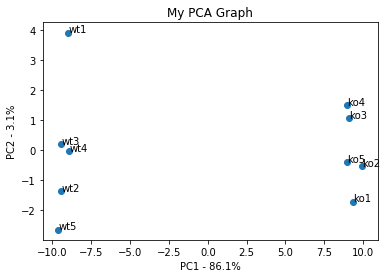

In [13]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [14]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [15]:
loading_scores
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

In [16]:
top_10_genes = sorted_loading_scores[0:10].index.values

In [17]:
top_10_genes

array(['gene82', 'gene27', 'gene56', 'gene7', 'gene76', 'gene88',
       'gene97', 'gene95', 'gene85', 'gene38'], dtype=object)